In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')


Libraries imported.


In [28]:
import pandas as pd

In [2]:
from bs4 import BeautifulSoup

## Data Frame Including Borough Population and Income in New York City

In [30]:
df = pd.read_csv("newYorkData.csv")
print('Data loaded')

Data loaded


In [33]:
df.head()

,Fact,Fact Note,"New York County (Manhattan Borough), New York","Value Note for New York County (Manhattan Borough), New York","Bronx County (Bronx Borough), New York","Value Note for Bronx County (Bronx Borough), New York","Queens County (Queens Borough), New York","Value Note for Queens County (Queens Borough), New York","Kings County (Brooklyn Borough), New York","Value Note for Kings County (Brooklyn Borough), New York","Richmond County (Staten Island Borough), New York","Value Note for Richmond County (Staten Island Borough), New York","New York city, New York","Value Note for New York city, New York"
0,"Population estimates, July 1, 2019, (V2019)",NaN,"1,628,706",NaN,"1,418,207",NaN,"2,253,858",NaN,"2,559,903",NaN,"476,143",NaN,"8,336,817",NaN
1,"Population estimates base, April 1, 2010, (V2...",NaN,"1,586,381",NaN,"1,384,580",NaN,"2,230,619",NaN,"2,504,721",NaN,"468,730",NaN,"8,175,031",NaN
2,"Population, percent change - April 1, 2010 (es...",NaN,2.7%,NaN,2.4%,NaN,1.0%,NaN,2.2%,NaN,1.6%,NaN,2.0%,NaN
3,"Population, Census, April 1, 2010",NaN,"1,585,873",NaN,"1,385,108",NaN,"2,230,722",NaN,"2,504,700",NaN,"468,730",NaN,"8,175,133",NaN
4,"Persons under 5 years, percent",NaN,4.7%,NaN,7.1%,NaN,6.1%,NaN,7.1%,NaN,5.7%,NaN,6.5%,NaN


### List of boroughs

In [58]:
bor = list(df.columns.values)
bor = bor[2:]
print(bor)

['New York County (Manhattan Borough), New York', 'Value Note for New York County (Manhattan Borough), New York', 'Bronx County (Bronx Borough), New York', 'Value Note for Bronx County (Bronx Borough), New York', 'Queens County (Queens Borough), New York', 'Value Note for Queens County (Queens Borough), New York', 'Kings County (Brooklyn Borough), New York', 'Value Note for Kings County (Brooklyn Borough), New York', 'Richmond County (Staten Island Borough), New York', 'Value Note for Richmond County (Staten Island Borough), New York', 'New York city, New York', 'Value Note for New York city, New York']


In [73]:
dfNY = pd.DataFrame(index=bor[2:len(bor):2], columns=["Population_2019","Income_2019"])
dfNY.head()

,Population_2019,Income_2019
"Bronx County (Bronx Borough), New York",NaN,NaN
"Queens County (Queens Borough), New York",NaN,NaN
"Kings County (Brooklyn Borough), New York",NaN,NaN
"Richmond County (Staten Island Borough), New York",NaN,NaN
"New York city, New York",NaN,NaN


In [74]:
for index, row in dfNY.iterrows():
    dfNY.at[index, 'Population_2019'] = df[index][0]
    dfNY.at[index, 'Income_2019'] = df[index][44]

In [75]:
dfNY=dfNY.sort_values('Income_2019',ascending=False)

In [78]:
dfNY=dfNY.drop(index='New York city, New York')

In [79]:
dfNY

,Population_2019,Income_2019
"Richmond County (Staten Island Borough), New York","476,143","$82,783"
"Queens County (Queens Borough), New York","2,253,858","$68,666"
"Kings County (Brooklyn Borough), New York","2,559,903","$60,231"
"Bronx County (Bronx Borough), New York","1,418,207","$40,088"


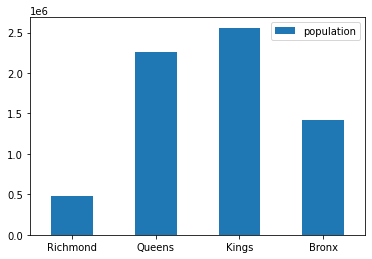

In [105]:
pop = [476143, 2253858, 2559903, 1418207]
inc = [82783,68666,60231,40088]
index=['Richmond','Queens','Kings','Bronx']
df = pd.DataFrame({'population': pop}, index=index)
ax = df.plot.bar(rot=0)

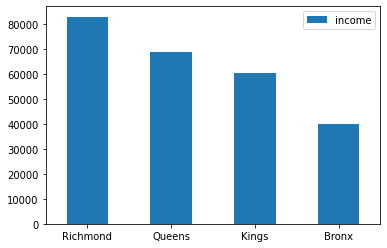

In [106]:
df2 = pd.DataFrame({'income': inc}, index=index)
ax = df2.plot.bar(rot=0)

In [107]:
address = "New York City, NY"
geolocator = Nominatim(user_agent="newYork_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [108]:
map_ny = folium.Map(location=[latitude, longitude], zoom_start=10)
map_ny

In [120]:
queens_loc = 'Queens, New York'
geolocator = Nominatim(user_agent="queens_explorer")
location = geolocator.geocode(queens_loc)
latitude = location.latitude
longitude = location.longitude
queens = [latitude, longitude]

richmond_loc = 'Richmond, New York'
geolocator = Nominatim(user_agent="richmond_explorer")
location = geolocator.geocode(richmond_loc)
latitude = location.latitude
longitude = location.longitude
richmond = [latitude, longitude]

bronx_loc = 'Bronx, New York'
geolocator = Nominatim(user_agent="bronx_explorer")
location = geolocator.geocode(bronx_loc)
latitude = location.latitude
longitude = location.longitude
bronx = [latitude, longitude]


kings_loc = 'Kings, New York'
geolocator = Nominatim(user_agent="kings_explorer")
location = geolocator.geocode(kings_loc)
latitude = location.latitude
longitude = location.longitude
kings = [latitude, longitude]


In [126]:
lat = [richmond[0], queens[0], kings[0], bronx[0]]
long = [richmond[1],queens[1],kings[1],bronx[1]]
borough=['Richmond','Queens','Kings','Bronx']
df_ny = pd.DataFrame({'borough':borough,
                     'latitude': lat,
                     'longitude':long})
df_ny

,borough,latitude,longitude
0,Richmond,42.760168,-77.494432
1,Queens,40.749824,-73.797634
2,Kings,43.150907,-73.854289
3,Bronx,40.846651,-73.878594


In [131]:
for a, b, c in zip(
        df_ny['latitude'], 
        df_ny['longitude'], 
        df_ny['borough']):
    label = '{}, {}'.format(b, c)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [a, b],
        popup=label,
        fill=True,
        parse_html=False).add_to(map_ny)  

In [133]:
map_ny

#### highlighted are the boroughs for potential resturaunt destinations

In [98]:
Richmond_ratio=82783/476143
Queens_ratio=68666/2253858
Kings_ratio=60231/22559903
Bronx_ratio=40088/1418207

In [99]:
Richmond_ratio

0.17386163400491028

In [100]:
Queens_ratio

0.03046598321633395

In [101]:
Kings_ratio

0.0026698253090893164

In [102]:
Bronx_ratio

0.028266677572455923

#### It seems as though Kings County has the best ratio of income to population so I would recommend opening a resturaunt there